1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
#Answer
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from scipy import stats


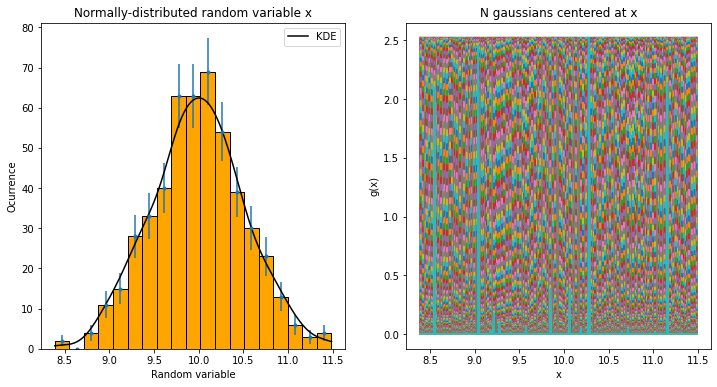

In [2]:
#Answer
N = 500
mu, sigma = 10.,0.5   # mean and standard deviation
x = np.random.normal(mu, sigma, N)


bn = np.arange(x.min(),x.max(),0.01) #number of bins
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

n, bins, _ = ax1.hist(x, bins="auto",color='orange', ec='black')
d = (bins[1]-bins[0])
ibn = [bins[0]+ d/2 + d*i for i in range(len(bins)-1)]
error = np.sqrt(n)

ax1.errorbar(ibn,n,yerr=error, fmt='.')
ax1.set_title('Normally-distributed random variable x')
ax1.set_ylabel('Ocurrence')
ax1.set_xlabel('Random variable')

gaussian_list = []
x_point = np.linspace(x.min(),x.max(),N)

for i in x:
    g_std  = 1.06 * x.std() * x.size**(-0.2)
    gaussian = norm.pdf(x_point,i,g_std)
    gaussian_list.append(gaussian)

ax2.plot(x_point,gaussian_list)
ax2.set_title('N gaussians centered at x')
ax2.set_ylabel('g(x)')
ax2.set_xlabel('x')


int_g = np.trapz(np.sum(gaussian_list,axis=0),x_point)
int_h = np.trapz(n,dx=d)
norm  = int_g/int_h                    #Normalisation constant

ax1.plot(x_point,np.sum(gaussian_list,axis =0)/norm, color='black', label='KDE')
ax1.legend()

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [3]:
#Example 
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
#from IPython.display import Image
#Image('two_categories_scatter_plot.png')

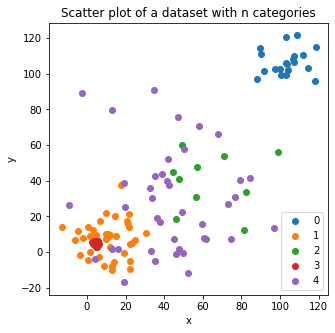

In [4]:
#Answer
# n: number of categories
# N: tuple, each element represent the ammount of elements in each category
# mu:tuple, each element represent the category mean
# sigma: tuple, each element represent the category std


def TDdataset(n,N,mu,sigma):
    dataset =[]
    
    for i in range(len(N)):
        l =np.arange(N[i])
        l.fill(int(i))
        x = np.random.normal(mu[i], sigma[i], (N[i],2))
        xl=np.c_[l,x]
        dataset.append(xl)       
    return dataset



n = 5
N = (20,40,10,20,40)
mu = (100.,10.,50,5,40)
sigma = (10.,10.,15,1.,30.)

a = TDdataset(n,N,mu,sigma)

fig, sct = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
for i in range(n):
    sct.scatter(a[i][:,1],a[i][:,2], label=str(int(a[i][0,0])))

sct.set_ylabel('y')
sct.set_xlabel('x')
plt.title('Scatter plot of a dataset with n categories')
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
#! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


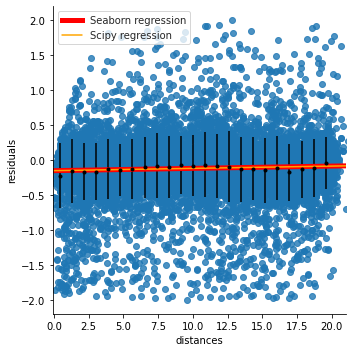

In [6]:
# Answer
data_r =pd.DataFrame(np.load('/home/usuario/data/residuals_261.npy', allow_pickle=True).item())

# Data cleaning
data_r = data_r[abs(data_r['residuals'])<2.]
print(data_r)

#Linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(data_r['distances'],data_r['residuals'])

#Seaborn Plot +  seaborn regression + scipy regression
plot = sns.lmplot(x='distances', y='residuals', data=data_r,
                  line_kws={'label':"Seaborn regression".format(slope,intercept),'color':'red','lw':'5'})
sns.set_style('whitegrid') 
plot.set(xlim=(-0.1,21))
distances = np.linspace(0,25,100,endpoint=True)
sns.lineplot(distances,distances*slope+intercept,color='orange', label = 'Scipy regression');

#Array filling
bins = 23
x = np.linspace(0,20,bins,endpoint=False)+(20/bins)/2  #Center of each bin

dx = x[1]-x[0]

y = np.array([(data_r[data_r['distances'].between(i-dx/2.,i+dx/2.)].mean(axis=0)[0]) for i in x])
erry = np.array([abs(data_r[data_r['distances'].between(i-dx/2.,i+dx/2.)].std(axis=0)[0]) for i in x])

#Plot adding
plt.errorbar(x,y,yerr=erry, fmt='.',color='black')
plt.show()

#I have issues while trying to show the profile plot label
#it seems that I should use seaborn pointplot but I could not work it out.